In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import copy
from scipy.linalg import svd, diagsvd

In [28]:
import pandas as pd
df = pd.read_csv('ratings_small.csv')
df = df.loc[:, df.columns != 'timestamp']
df_matrix = df.to_numpy()

In [29]:
def randomiza_item_matriz(A):
    B = copy.deepcopy(A)
    r_i = random.randint(0,len(A)-1)
    r_j = random.randint(0,len(A[r_i])-1)
    r_v = random.randint(0,11)
    B[r_i,r_j] = r_v
    return B, (r_i,r_j)

E, ij = randomiza_item_matriz(df_matrix)

print(df_matrix [ij[0], ij[1]])
print(E [ij[0], ij[1]])

8961.0
8.0


In [30]:
# preparando a matriz A
df_ = pd.pivot_table(data = df, index = 'userId', columns ='movieId', values = 'rating',aggfunc='mean')
df_ = df_.fillna(0)
df_.shape

(671, 9066)

In [31]:
X, s, Y = np.linalg.svd(df_)

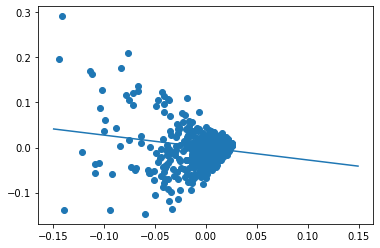

In [41]:
x = X - np.mean(X, axis=0, keepdims=True) # Linha 2

C = x.T @ x
C /= x.shape[0]-1
w, v = np.linalg.eig(C)
v0 = v[:,0]
v1 = v[:,1]

t = np.linspace(-1,1,100)
p = [t[i] * v1 for i in range(100)]
p = np.array(p)
p.shape

plt.figure()
plt.scatter(x[:,0],x[:,1])
plt.plot(4*p[:,0],4*p[:,1])
plt.show()